In [1]:
from imdb import IMDb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# plotting parameters
%matplotlib inline
plt.rcParams['figure.figsize'] = (3, 3)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.facecolor'] = 'w'

In [3]:
# create an instance of the IMDb class
ia = IMDb()

In [4]:
# read list of ratings
df_ratings = pd.read_csv('../data/IMDB_Top250_UID_title_rating.csv')
df_ratings.head()

,UID,Title,Rating
0,111161,The Shawshank Redemption,9.3
1,68646,The Godfather,9.2
2,71562,The Godfather: Part II,9.0
3,468569,The Dark Knight,9.0
4,50083,12 Angry Men,8.9


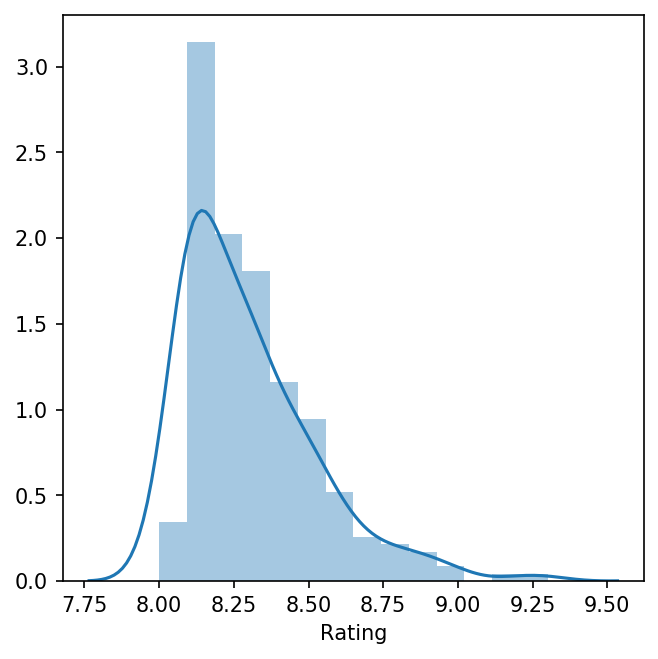

In [5]:
# histogram of ratings
sns.distplot(df_ratings.Rating)
plt.show()

In [6]:
# binarize the Ratings
df_ratings.Rating.describe()

count    250.000000
mean       8.298400
std        0.226545
min        8.000000
25%        8.100000
50%        8.200000
75%        8.400000
max        9.300000
Name: Rating, dtype: float64

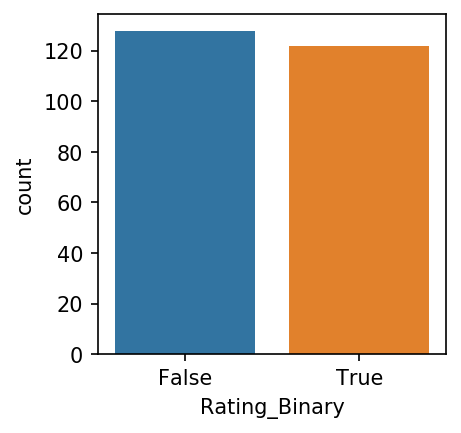

In [32]:
# create new column
df_ratings.loc[:, 'Rating_Binary'] = df_ratings.Rating > 8.2
sns.countplot(df_ratings.Rating_Binary)
plt.show()

# Search by Title, Year

In [39]:
help(ia.search_movie)

Help on method search_movie in module imdb:

search_movie(title, results=None, _episodes=False) method of imdb.parser.http.IMDbHTTPAccessSystem instance
    Return a list of Movie objects for a query for the given title.
    The results argument is the maximum number of results to return.



In [ ]:
ia = IMDb()
movies = ia.search_movie(title)

In [36]:
movies = ia.search_movie('lord of the rings')
movies

[<Movie id:0120737[http] title:_The Lord of the Rings: The Fellowship of the Ring (2001)_>,
 <Movie id:7631058[http] title:_"The Lord of the Rings" (None)_>,
 <Movie id:8306578[http] title:_"Lord of the Rings" (2014)_>,
 <Movie id:6482606[http] title:_Lord of the Rings (By Spring) (2017)_>,
 <Movie id:0974590[http] title:_The Lord of the Rings Online (2007) (VG)_>,
 <Movie id:0154789[http] title:_Lord of the Rings (1990) (VG)_>,
 <Movie id:0392354[http] title:_Lord of the Rings: Game One (1986) (VG)_>,
 <Movie id:9630166[http] title:_Lord of the Rings by George Lucas (2003)_>,
 <Movie id:0077869[http] title:_The Lord of the Rings (1978)_>,
 <Movie id:0167260[http] title:_The Lord of the Rings: The Return of the King (2003)_>,
 <Movie id:0167261[http] title:_The Lord of the Rings: The Two Towers (2002)_>,
 <Movie id:9144676[http] title:_The Lord of the Rings (2017) (V)_>,
 <Movie id:2502200[http] title:_"Raising Hope" Lord of the Ring (2013)_>,
 <Movie id:1300833[http] title:_"Little Mo

In [38]:
for movie in movies:
    if 'year' in movie.keys():
        print(movie['year'])
    else:
        print('No year!')

2001
No year!
2014
2017
2007
1990
1986
2003
1978
2003
2002
2017
2013
2008
2009
2019
2012
2002
1971
2002


In [33]:
help(ia.search_movie)

Help on method search_movie in module imdb:

search_movie(title, results=None, _episodes=False) method of imdb.parser.http.IMDbHTTPAccessSystem instance
    Return a list of Movie objects for a query for the given title.
    The results argument is the maximum number of results to return.



# Acquire Features

In [8]:
# define function that searches for movie
def search_title_get_first_movie(title):
    """returns first movie in search results"""
    # create an instance of the IMDb class
    ia = IMDb()
    movies = ia.search_movie(title)
    first_id = movies[0].movieID
    movie = ia.get_movie(first_id)
    return(movie)

In [9]:
# test
test_movie = search_title_get_first_movie('Avengers')
test_movie

<Movie id:0848228[http] title:_The Avengers (2012)_>

In [10]:
test_movie['box office']['Budget']

'$220,000,000 (estimated)'

In [11]:
test_movie['box office']['Opening Weekend United States']

'$207,438,708, 06 May 2012'

In [12]:
test_movie['box office']['Cumulative Worldwide Gross']

'$1,517,935,897, 31 Dec 2012'

In [13]:
# test_movie['cast'][:5]

In [14]:
test_movie['countries']

['United States']

In [15]:
test_movie['directors']

[<Person id:0923736[http] name:_Joss Whedon_>]

In [16]:
test_movie['genres']

['Action', 'Adventure', 'Sci-Fi']

In [17]:
test_movie['runtimes']

['143']

In [18]:
# test_movie['synopsis'][0][:100]

In [19]:
test_movie['title']

'The Avengers'

In [20]:
test_movie['votes']

1220640

In [21]:
test_movie['writers']

[<Person id:0923736[http] name:_Joss Whedon_>,
 <Person id:None[http] name:_None_>,
 <Person id:0672015[http] name:_Zak Penn_>,
 <Person id:0923736[http] name:_Joss Whedon_>]

In [22]:
test_movie['year']

2012

In [23]:
test_movie['aspect ratio']

'1.78 : 1 (Blu-ray release)'

In [24]:
# define list of high-level features
features_hl = ['aspect ratio', 'box office', 'countries', 'directors',
               'genres', 'runtimes', 'title', 'votes', 'writers', 'year']

In [25]:
# check existence of each high-level feature
for feature in features_hl:
    if not feature in test_movie.keys():
        raise ValueError('%s Not found in object!' % feature)
    print(feature)

aspect ratio
box office
countries
directors
genres
runtimes
title
votes
writers
year


In [26]:
# define list of low-level features
features_ll = {'box office':['Budget', 'Cumulative Worldwide Gross'],
               'countries': [0], 'directors':[0], 'genres': [0, 1, 2],
               'runtimes':[0], 'writers': [0, 1, 2]}

In [27]:
# check existence of each low-level feature
for feature in features_ll.keys():
    item_hl = test_movie[feature]
    keys_ll = features_ll[feature]
    for key_ll in keys_ll:
        if isinstance(item_hl, dict):
            if not key_ll in item_hl:
                raise ValueError('%s Not found in object!' % key_ll)
        print(item_hl[key_ll])

$220,000,000 (estimated)
$1,517,935,897, 31 Dec 2012
United States
Joss Whedon
Action
Adventure
Sci-Fi
143
Joss Whedon

Zak Penn


In [28]:
features_hl

['aspect ratio',
 'box office',
 'countries',
 'directors',
 'genres',
 'runtimes',
 'title',
 'votes',
 'writers',
 'year']

In [29]:
# define function to acquire features
def acquire_features(movie):
    """returns dictionary of desired features"""
    
    
    
    

In [30]:
sorted(test_movie.keys())

['akas',
 'animation department',
 'art department',
 'art directors',
 'aspect ratio',
 'assistant directors',
 'box office',
 'camera department',
 'canonical title',
 'cast',
 'casting department',
 'casting directors',
 'certificates',
 'cinematographers',
 'color info',
 'composers',
 'costume departmen',
 'costume designers',
 'countries',
 'country codes',
 'cover url',
 'director',
 'directors',
 'distributors',
 'editorial department',
 'editors',
 'full-size cover url',
 'genres',
 'kind',
 'language codes',
 'languages',
 'location management',
 'long imdb canonical title',
 'long imdb title',
 'make up department',
 'miscellaneous',
 'music department',
 'original air date',
 'other companies',
 'plot',
 'plot outline',
 'producers',
 'production companies',
 'production designers',
 'production managers',
 'rating',
 'runtimes',
 'script department',
 'set decorators',
 'smart canonical title',
 'smart long imdb canonical title',
 'sound department',
 'sound mix',
 'specia